In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [144]:
file_path = 'data.csv'

data = pd.read_csv(file_path)

data["sex"].replace(['male', 'female'], [0, 1], inplace=True)
data["smoker"].replace(['no', 'yes'], [0, 1],  inplace=True)


region_dummies = pd.get_dummies(data['region'], prefix='is', prefix_sep='_')
# Concaténer les colonnes binaires avec le DataFrame original
data = pd.concat([data, region_dummies], axis=1)

# Vérification des informations manquantes et des doublons
missing_data = data.isnull().sum()
duplicates = data.duplicated().sum()
data = data.drop_duplicates()


X = data.drop('charges', axis=1)
y = data['charges']

Les données suivent -elles une distribution normale ?

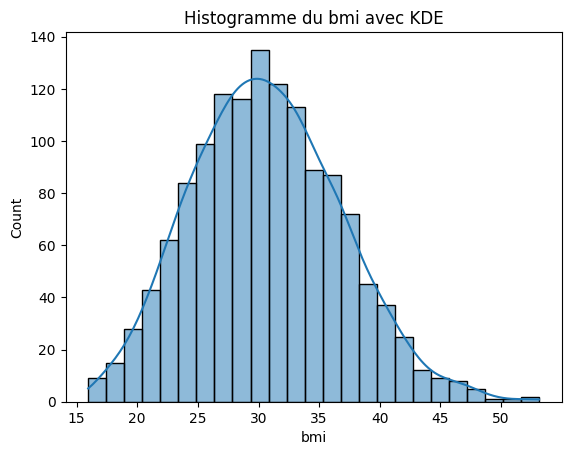

In [145]:
import matplotlib.pyplot as plt
sns.histplot(data['bmi'], kde=True,)

plt.title("Histogramme du bmi avec KDE")
plt.show()

Est-ce qu’il y a des valeurs aberrantes ?

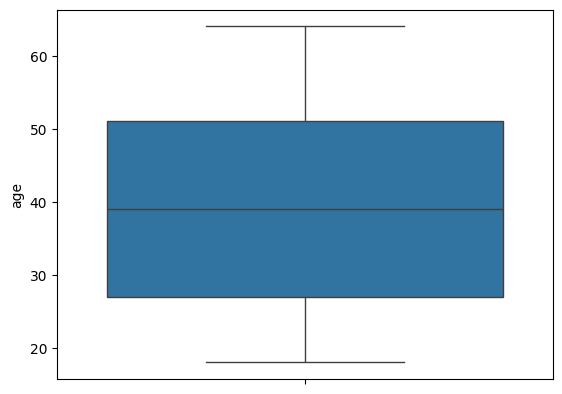

In [146]:
sns.boxplot(data['age'])
plt.show()

 faire une Analyse univariée de chaque variable

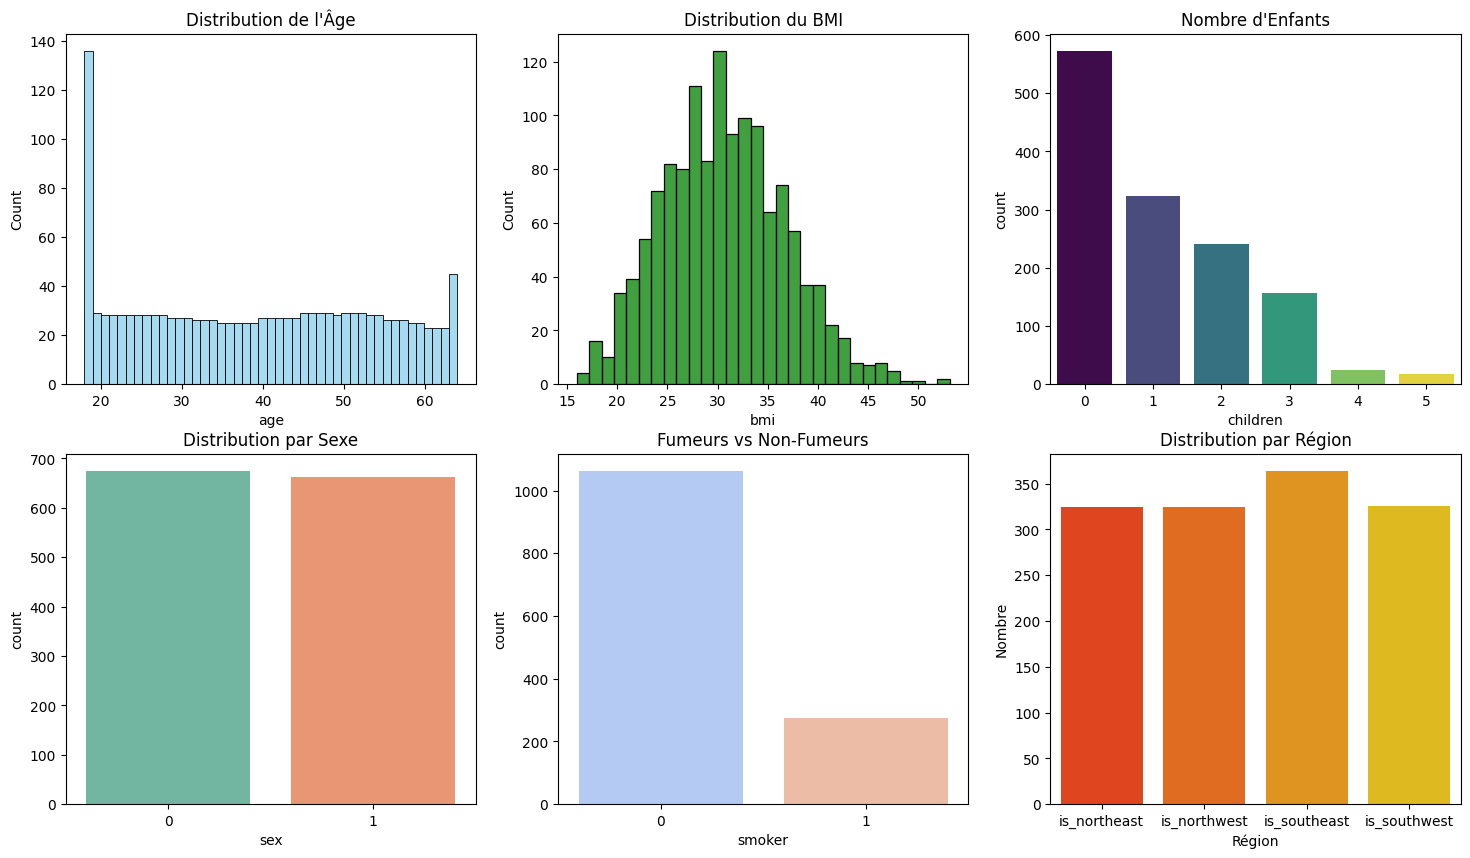

In [147]:
# Analyse univariée de chaque variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Distribution de l'âge
sns.histplot(data['age'], bins=45, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution de l\'Âge')

# Distribution du BMI
sns.histplot(data['bmi'], bins=30, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution du BMI')

# Distribution du Nombre d'Enfants
sns.countplot(x='children', data=data, hue='children', ax=axes[0, 2], palette='viridis', legend=False)
axes[0, 2].set_title('Nombre d\'Enfants')

# Distribution par Sexe
sns.countplot(x='sex', data=data, hue='sex', ax=axes[1, 0], palette='Set2', legend=False)
axes[1, 0].set_title('Distribution par Sexe')

# Distribution Fumeurs / Non-Fumeurs
sns.countplot(x='smoker', data=data, hue='smoker', ax=axes[1, 1], palette='coolwarm', legend=False)
axes[1, 1].set_title('Fumeurs vs Non-Fumeurs')

# Distribution par Région
region_cols = ['is_northeast', 'is_northwest', 'is_southeast', 'is_southwest']
region_counts = data[region_cols].sum()

sns.barplot(x=region_counts.index, y=region_counts.values, hue=region_counts.index, ax=axes[1, 2], palette='autumn', legend=False)
axes[1, 2].set_title('Distribution par Région')
axes[1, 2].set_xlabel('Région')
axes[1, 2].set_ylabel('Nombre')

plt.show()



Observation d'un grand nombre d'individus âgés de 18 et 19 ans.

In [148]:
occurence_age = data['age'].value_counts()
occurence_age_sorted = occurence_age.sort_index()
occurence_age_sorted.head()

age
18    69
19    67
20    29
21    28
22    28
Name: count, dtype: int64

Étudier la corrélation des variables avec la variable cible.

In [149]:

non_numeric_columns = ['region'] 

# Converti les données des régions splitées pour le score de corrélation
encoder = OneHotEncoder(sparse=False)
encoded_columns = pd.DataFrame(encoder.fit_transform(data[non_numeric_columns]))


data = data.join(encoded_columns).drop(non_numeric_columns, axis=1)



/home/antoine/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


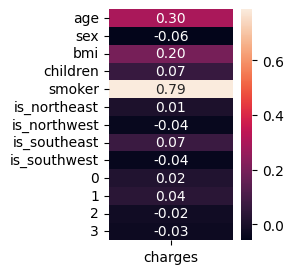

In [150]:
# Calculer la correlation de chaque catégorie
correlation_matrix = data.corr()

# Créer une variable avec toutes les catégories sauf les charges
correlation_with_charges = correlation_matrix.loc['charges'].drop('charges')

# Créer un nouveau DF pour l'affichage avec les correlations sur charges
heatmap_data = pd.DataFrame(correlation_with_charges)

# Visualisation des donnée
plt.figure(figsize=(2, 3))
sns.heatmap(heatmap_data, annot=True, fmt=".2f")
plt.show()

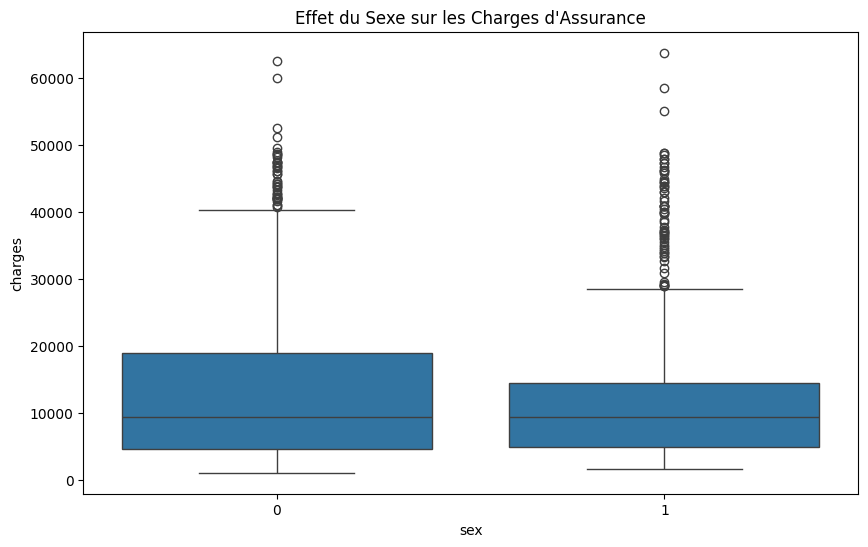

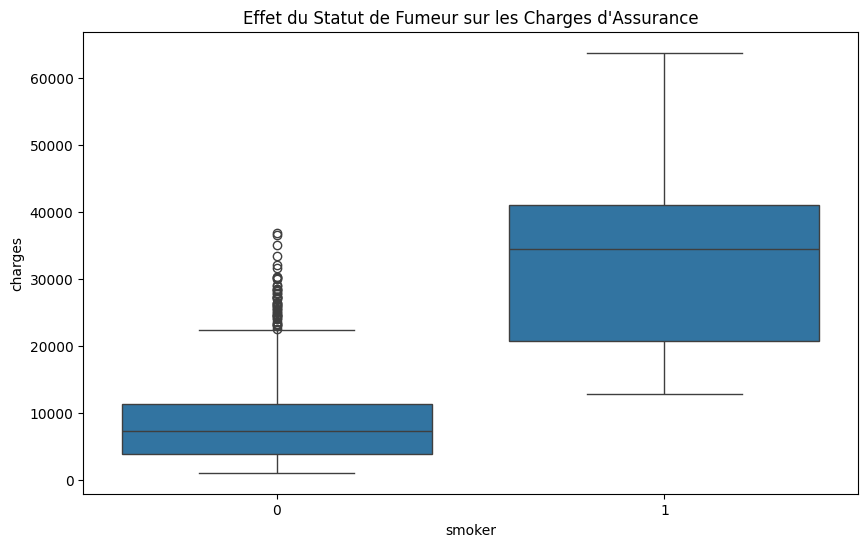

Text(0.5, 1.0, "Effet des childrens sur les charges d'assurance")

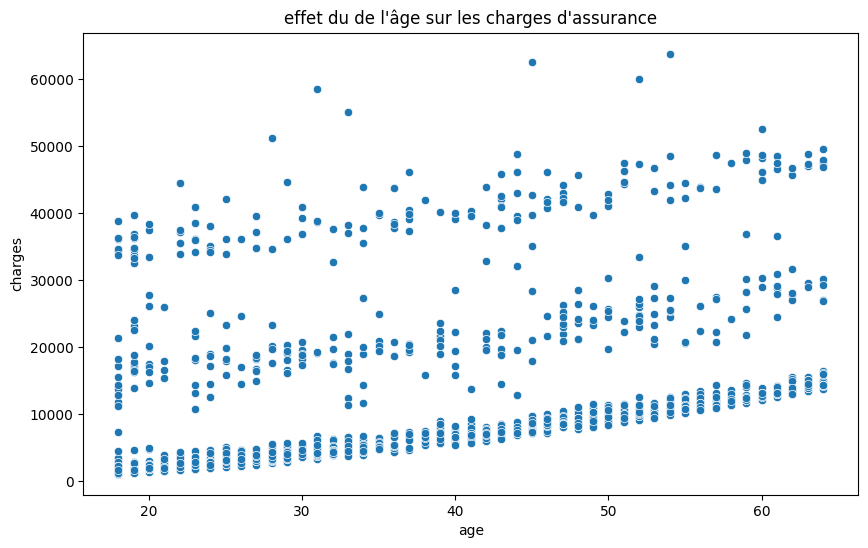

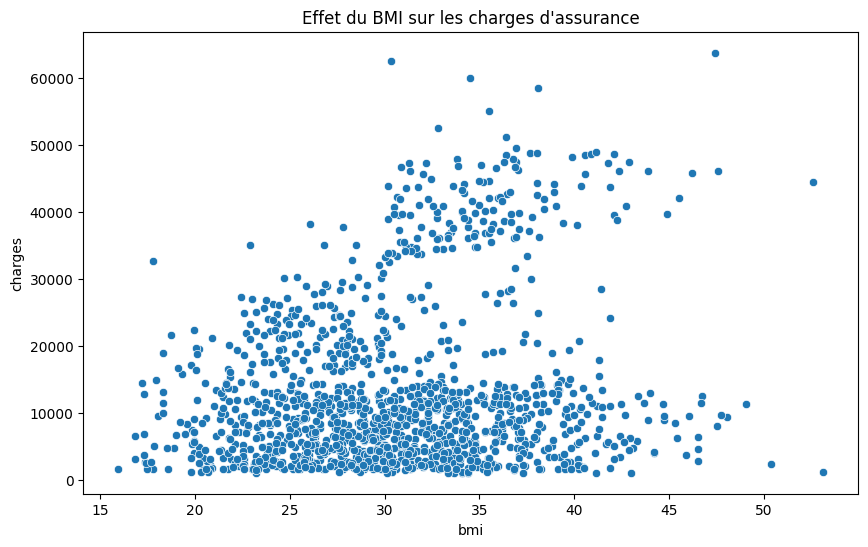

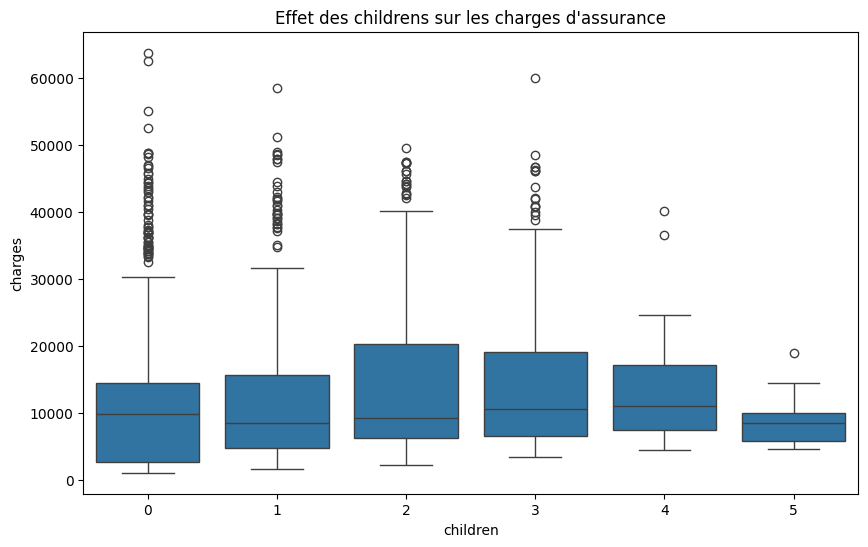

In [151]:
# Boxplot pour analyser l'effet du sexe sur les charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Effet du Sexe sur les Charges d\'Assurance')
plt.show()

# Boxplot pour analyser l'effet du statut de fumeur sur les charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Effet du Statut de Fumeur sur les Charges d\'Assurance')
plt.show()

# Boxplot pour analyser l'effet de l'age sur les charges
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='charges', data=data)
plt.title("effet du de l'âge sur les charges d\'assurance")

#Boxplot pour analyser l'effet du bmi sur les charges
plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='charges', data= data)
plt.title('Effet du BMI sur les charges d\'assurance')

#Boxplot pour analyser l'effet des childrens sur les charges
plt.figure(figsize=(10,6))
sns.boxplot(x='children', y='charges', data= data)
plt.title('Effet des childrens sur les charges d\'assurance')




faire un OLS Regression Results sur les trois qui se demarquent dans le test de correlation : Smoker, age et bmi

In [153]:
import statsmodels.api as sm
# Ajustement du modèle de régression linéaire
model = sm.OLS(data['charges'], data['age'])
results = model.fit()

# Affichage des résultats
results.summary()

# R-squared indique que 58.3% de la variance des "charges" est expliquée par le(s) variable(s) indépendante(s) dans le modèle. Ce chiffre est assez élevé, suggérant que le modèle a une bonne capacité explicative.
# F-statistic: 1867: La statistique F mesure la signification globale du modèle. Une valeur élevée (1867 dans ce cas) indique que le modèle est statistiquement significatif.
#Prob (F-statistic): 5.68e-256: La valeur p associée à la statistique F. Une valeur très faible (près de zéro) suggère que la relation que le modèle a trouvée est statistiquement significative.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.583
Model:                            OLS   Adj. R-squared (uncentered):              0.583
Method:                 Least Squares   F-statistic:                              1867.
Date:                Tue, 09 Jan 2024   Prob (F-statistic):                   5.68e-256
Time:                        15:44:05   Log-Likelihood:                         -14410.
No. Observations:                1337   AIC:                                  2.882e+04
Df Residuals:                    1336   BIC:                                  2.883e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          329.3251      7.621     43.212      0.000     314.375     344.276
==============================================================================
Omnibus:                      392.737   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              837.983
Skew:                           1.713   Prob(JB):                    1.08e-182
Kurtosis:                       4.818   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
import statsmodels.api as sm
# Ajustement du modèle de régression linéaire
model = sm.OLS(data['charges'], data['bmi'])
results = model.fit()

# Affichage des résultats
results.summary()

#56 % , F de 1727 c'est pas mal, GG félicitations !

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.564
Model:                            OLS   Adj. R-squared (uncentered):              0.563
Method:                 Least Squares   F-statistic:                              1727.
Date:                Tue, 09 Jan 2024   Prob (F-statistic):                   5.78e-243
Time:                        15:44:05   Log-Likelihood:                         -14440.
No. Observations:                1337   AIC:                                  2.888e+04
Df Residuals:                    1336   BIC:                                  2.889e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bmi          431.5686     10.385     41.556      0.000     411.196     451.942
==============================================================================
Omnibus:                      250.563   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              405.504
Skew:                           1.265   Prob(JB):                     8.83e-89
Kurtosis:                       3.936   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
import statsmodels.api as sm
# Ajustement du modèle de régression linéaire
model = sm.OLS(data['charges'], data['children'])
results = model.fit()

# Affichage des résultats
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.282
Model:                            OLS   Adj. R-squared (uncentered):              0.281
Method:                 Least Squares   F-statistic:                              523.9
Date:                Tue, 09 Jan 2024   Prob (F-statistic):                    4.28e-98
Time:                        15:44:05   Log-Likelihood:                         -14774.
No. Observations:                1337   AIC:                                  2.955e+04
Df Residuals:                    1336   BIC:                                  2.955e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
children    5855.1943    255.808     22.889      0.000    5353.365    6357.023
==============================================================================
Omnibus:                      177.893   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.278
Skew:                           0.954   Prob(JB):                     1.84e-57
Kurtosis:                       4.026   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
import statsmodels.api as sm
# Ajustement du modèle de régression linéaire
model = sm.OLS(data['charges'], data['sex'])
results = model.fit()

# Affichage des résultats
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.242
Model:                            OLS   Adj. R-squared (uncentered):              0.242
Method:                 Least Squares   F-statistic:                              427.2
Date:                Tue, 09 Jan 2024   Prob (F-statistic):                    1.44e-82
Time:                        15:44:05   Log-Likelihood:                         -14809.
No. Observations:                1337   AIC:                                  2.962e+04
Df Residuals:                    1336   BIC:                                  2.963e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sex         1.257e+04    608.152     20.668      0.000    1.14e+04    1.38e+04
==============================================================================
Omnibus:                      219.833   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              338.775
Skew:                           1.138   Prob(JB):                     2.73e-74
Kurtosis:                       3.947   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""